<a href="https://colab.research.google.com/github/KNL1979/DS807/blob/main/Q2_autoencoder_AE9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder model AE9


In [ ]:
# U=upgrade and q=quiet
!pip install wandb -Uq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Dropout,BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt

import os
import wandb
from wandb.keras import WandbCallback

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# path to file
%cd '/content/gdrive/MyDrive/Applied_ML'

/content/gdrive/MyDrive/Applied_ML


In [ ]:
# Load the training data features
X_train = np.load('eksamen/dataset/X_train_new.npy')
X_val = np.load('eksamen/dataset/X_val_new.npy')
X_test = np.load('eksamen/dataset/X_test_new.npy')
print(f'Shape of the training data: {X_train.shape}')
print(f'Shape of the validataion data: {X_val.shape}')
print(f'Shape of the test data: {X_test.shape}')

Shape of the training data: (55050, 96, 96, 3)
Shape of the validataion data: (15729, 96, 96, 3)
Shape of the test data: (7864, 96, 96, 3)


In [ ]:
# settings for Wandb
os.environ["WANDB_API_KEY"]= '1bff76125a134665e9d30342c447d7616c5fd3c3'
os.environ["WANDB_NAME"]= 'AE_9_save_decoder'
os.environ["WANDB_NOTEBOOK_NAME"]='AE_9_save_decoder.ipynb'
run = wandb.init(project="Autoencoder",entity='coffeegang',job_type='train')
config = wandb.config

wandb: Currently logged in as: metterosenfjeld (coffeegang). Use `wandb login --relogin` to force relogin


In [ ]:
# Define WandbCallback for experiment tracking
wandb_callback = WandbCallback(monitor='val_loss',verbose=True,save_model=False,
                               log_weights=True,
                               log_evaluation=True,
                               validation_steps=2)
callbacks = [wandb_callback]

In [ ]:
# build autoencoder
encoder = tf.keras.models.Sequential([
    Conv2D(128, 3, 2, activation='relu', padding='same', input_shape=(96, 96, 3)),
    Conv2D(64, 3, 2, activation='relu', padding='same'),
    Conv2D(32, 3, 2, activation='relu', padding='same')
], name='encoder')

decoder = tf.keras.models.Sequential([
    Conv2DTranspose(32, 3, 2, padding='same', activation='relu', input_shape=(12, 12, 32)),
    Conv2DTranspose(64, 3, 2, padding='same', activation='relu'),
    Conv2DTranspose(128, 3, 2, padding='same', activation='relu'),
    Conv2D(3, 3, activation='sigmoid', padding='same')
], name='decoder')

autoencoder = tf.keras.models.Sequential([encoder, decoder], name = 'autoencoder')
autoencoder.compile(loss='mse', optimizer='adam',  metrics=['mae'])

encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
Total params: 95840 (374.38 KB)
Trainable params: 95840 (374.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 24, 24, 32)        9248      
 anspose)                                                        
    

In [ ]:
# fit autoencoder
history = autoencoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=50, verbose=1, callbacks=callbacks)

wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/50
   2/1721 [..............................] - ETA: 5:23 - loss: 0.0825 - mae: 0.2467   

1721/1721 [==============================] - 36s 17ms/step - loss: 0.0130 - mae: 0.0829 - val_loss: 0.0079 - val_mae: 0.0657
Epoch 2/50
1721/1721 [==============================] - 24s 14ms/step - loss: 0.0070 - mae: 0.0621 - val_loss: 0.0072 - val_mae: 0.0631
Epoch 3/50
1721/1721 [==============================] - 24s 14ms/step - loss: 0.0061 - mae: 0.0574 - val_loss: 0.0056 - val_mae: 0.0551
Epoch 4/50
1721/1721 [==============================] - 23s 14ms/step - loss: 0.0055 - mae: 0.0547 - val_loss: 0.0053 - val_mae: 0.0535
Epoch 5/50
1721/1721 [==============================] - 24s 14ms/step - loss: 0.0052 - mae: 0.0529 - val_loss: 0.0050 - val_mae: 0.0517
Epoch 6/50
1721/1721 [==============================] - 23s 14ms/step - loss: 0.0050 - mae: 0.0518 - val_loss: 0.0053 - val_mae: 0.0540
Epoch 7/50
1721/1721 [==============================] - 24s 14ms/step - loss: 0.0048 - mae: 0.0511 - val_loss: 0.0047 - val_mae: 0.0505
Epoch 8/50
1721/1721 [==============================] - 24s

In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▄▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_mae,█▇▄▄▄▂▂▂▂▂▂▂▂▁▂▂▂▁▁▂▂▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,49
best_val_loss,0.00403
epoch,49
loss,0.00406
mae,0.04664
val_loss,0.00403


In [ ]:
# save weights from the decoder - must be used for reconstruction of images as preprocessing during classification
decoder.save_weights('decoder_weights.h5')

In [ ]:
autoencoder.save('AE_9')

In [ ]:
# reconstruct the first image in the validation dataset to visualize reconstructed images
reconstructed_img = autoencoder.predict(X_val[:16])
print(reconstructed_img.shape)

1/1 [==============================] - 0s 432ms/step
(16, 96, 96, 3)


In [ ]:
# Create a 2x8 subplot grid
fig, axs = plt.subplots(2, 8, figsize=(16, 4))

for i in range(16):
    # Calculate the row and column indices
    row = i // 8
    col = i % 8

    # Display the image in the corresponding subplot
    axs[row, col].imshow(reconstructed_img[i][:, :, :])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 8, figsize=(16, 4))
minival = X_val[:16]

for i in range(16):
    row = i // 8
    col = i % 8

    axs[row, col].imshow(minival[i])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# predict latent space
latent_X_val = encoder.predict(X_val)
np.save('eksamen/AE9_latent_X_val.npy', latent_X_val)

492/492 [==============================] - 1s 2ms/step


In [ ]:
print(latent_X_val.shape)

(15729, 12, 12, 32)


In [ ]:
# predict latent space
latent_X_train = encoder.predict(X_train)
np.save('eksamen/AE9_latent_X_train.npy', latent_X_train)

1721/1721 [==============================] - 4s 2ms/step


In [ ]:
print(latent_X_train.shape)

(55050, 12, 12, 32)


In [ ]:
X_test = np.load('eksamen/dataset/X_test_new.npy')

In [ ]:
print(X_test.shape)

(7864, 96, 96, 3)


In [ ]:
# predict latent space
latent_X_test = encoder.predict(X_test)
np.save('eksamen/AE9_latent_X_test.npy', latent_X_test)

246/246 [==============================] - 1s 3ms/step


In [ ]:
print(latent_X_test.shape)

(7864, 12, 12, 32)


## Calculate MSE and PSNR

In [ ]:
AE9 = tf.keras.models.load_model('AE_9')

In [ ]:
# reconstruct the images using the test dataset
reconstructed_AE9 = AE9.predict(X_test)

246/246 [==============================] - 4s 6ms/step


In [ ]:
# find mean squared error between the original images and the images in the test set
def mse_reconstruction(reconstructed):
  mse_reconstruction = np.mean(np.square(reconstructed - X_test))
  return mse_reconstruction

In [ ]:
# Peak signal to noise ratio
from math import log10
def PSNR(original, reconstructed):
  PSNR_list = []
  # set max to 1 (the highes intensity for a pixel), calculate Mean Square Error and Peak signal-to-noise-ratio
  MAX = 1
  MSE = np.mean((original.astype('float') - reconstructed.astype('float'))**2)
  PSNR = 20 * log10(MAX/(MSE**0.5))

  return PSNR

In [ ]:
# Find mean and standard deviation for the metrics Peak signal to noise (PSNR) and mean squared error (MSE)
def PSNR_MSE(reconstructed):

  PSNR_list = []
  for ori, recon in zip(X_test, reconstructed):
    PSNR_value = PSNR(ori, recon)
    PSNR_list.append(PSNR_value)

  plt.hist(PSNR_list, bins=30, edgecolor='black')
  plt.show

  PSNR_mean = np.mean(PSNR_list)
  PSNR_std = np.std(PSNR_list)

  mse = mse_reconstruction(reconstructed)

  return PSNR_mean, PSNR_std, mse

(24.624494608533073, 2.907603015150458, 0.004010719)

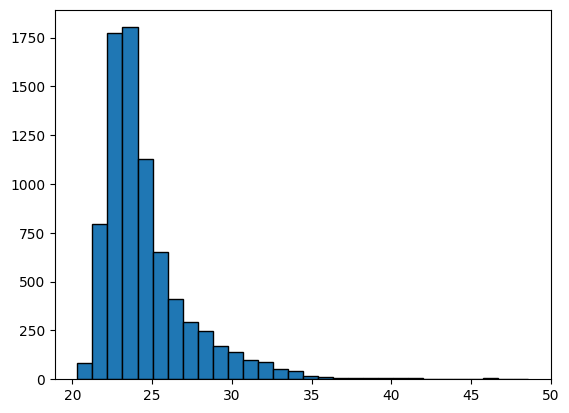

In [ ]:
PSNR_MSE(reconstructed_AE9)